In [1]:
# Fixing Skewness AFTER Outlier Handling 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Uploading imputed data to df from CSV WorkingDataFrame
df = pd.read_csv('MMNormDF4', index_col=0)

In [4]:
# Checking Skew of DataFrame
df.skew()
# Ignoring C2 and C3' because they are binary 

C1     0.397173
C2    -2.123926
C4    -0.485756
C7     1.083739
C3'   -0.117764
C5'    0.402034
C6'    1.195068
T4'   -0.028974
T3'    0.315086
T5'    0.448520
S1'    0.482959
S2'    0.519102
S3'    0.349871
dtype: float64

Text(0.5, 1.0, 'Fixed Skew - C7')

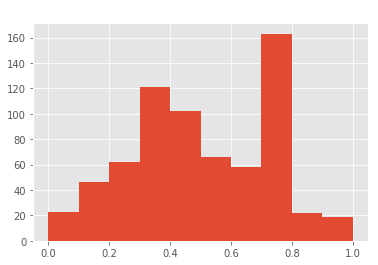

In [5]:
# Fixing Positive Skew of C7
df['C7'] = np.cbrt(df['C7'])
plt.hist(df['C7'])
plt.title("Fixed Skew - C7", color='white')

In [6]:
# Checking Skew of DataFrame
df.skew()

C1     0.397173
C2    -2.123926
C4    -0.485756
C7    -0.053332
C3'   -0.117764
C5'    0.402034
C6'    1.195068
T4'   -0.028974
T3'    0.315086
T5'    0.448520
S1'    0.482959
S2'    0.519102
S3'    0.349871
dtype: float64

In [8]:
# Bringing back the "Y" values that we took out earlier to not interfere with analysis 
target = pd.read_csv('Targets4', index_col=0)
target.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,0,1


In [9]:
# Getting Target values alone
target = target.drop(['I1', 'I2', 'I3', 'P_IPO', 'P_H', 'P_L', "P_1DAY"], axis=1)
target.head()

,Y1,Y2
0,0,1
1,1,0
2,1,0
3,1,1
4,0,1


In [10]:
# Creating new DataFrame that combines two target variables and all the predictors
# This is ready for feature selection and binning processes  
ReadyDF4 = pd.concat([target,df], axis=1)
ReadyDF4.head()

,Y1,Y2,C1,C2,C4,C7,C3',C5',C6',T4',T3',T5',S1',S2',S3'
0,0,1,0.462810,1.0,0.749962,0.353538,1.0,0.476417,0.629630,0.534453,0.523574,0.466548,0.425373,0.436937,0.457490
1,1,0,0.589876,0.0,0.583748,0.281428,0.0,0.609551,0.000000,0.545989,0.887042,0.850134,0.492537,1.000000,0.854251
2,1,0,0.330579,1.0,0.717213,0.184643,0.0,0.410536,0.000000,0.524832,0.216722,0.140946,0.417910,0.058559,0.137652
3,1,1,0.822314,1.0,0.714502,0.193850,0.0,0.401299,0.000000,0.265799,0.343041,0.305085,0.559701,0.175676,0.340081
4,0,1,0.289256,1.0,0.499347,0.816776,1.0,0.458048,0.283333,0.393150,0.596766,0.493310,0.462687,0.581081,0.570850


In [11]:
# Exporting DataFrame as CSV 
ReadyDF4.to_csv('ReadyDF4', ',')